In [5]:
import numpy as np
import sysid
import pylab as pl
import time
import pandas as pd
import scipy
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
ss1 = sysid.StateSpaceDiscreteLinear(
    A=0.9, B=0.5, C=1, D=0, Q=0.1, R=0.01, dt=0.1)
ss1

{'A': matrix([[0.9]]), 'B': matrix([[0.5]]), 'C': matrix([[1]]), 'D': matrix([[0]]), 'Q': matrix([[0.1]]), 'R': matrix([[0.01]]), 'dt': 0.1}

In [7]:
#np.random.seed(1234)
prbs1 = sysid.prbs(1000)
def f_prbs(t, x, i):
    return prbs1[i]

In [8]:
tf = 10
data = ss1.simulate(f_u=f_prbs, x0=np.matrix(0), tf=tf)
ss1_id = sysid.subspace_det_algo1(y=data.y, u=data.u,
    f=5, p=5, s_tol=1e-1, dt=ss1.dt)
data_id = ss1_id.simulate(f_u=f_prbs, x0=0, tf=tf)
ss1_id

{'A': matrix([[0.89104361]]), 'B': matrix([[0.6001171]]), 'C': matrix([[1.]]), 'D': matrix([[0.02334164]]), 'Q': matrix([[0.]]), 'R': matrix([[0.]]), 'dt': 0.1}

fit 89.001035%


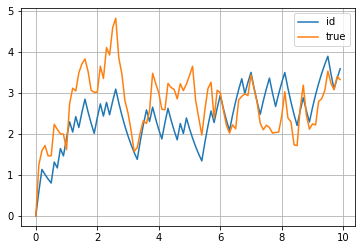

In [9]:
pl.plot(data_id.t.T, data_id.x.T, label='id');
pl.plot(data.t.T, data.x.T, label='true');
pl.legend()
pl.grid()
print('fit {:f}%'.format(100*sysid.subspace.nrms(data_id.y, data.y)))

In [10]:
ss2 = sysid.StateSpaceDiscreteLinear(
    A=np.matrix([[0,0.1,0.2],[0.2,0.3,0.4],[0.4,0.3,0.2]]),
    B=np.matrix([[1,0],[0,1],[0,-1]]),
    C=np.matrix([[1,0,0],[0,1,0]]), D=np.matrix([[0,0],[0,0]]),
    Q=pl.diag([0.1,0.1,0.1]), R=pl.diag([0.04,0.04]), dt=0.1)
ss2

{'A': matrix([[0. , 0.1, 0.2],
        [0.2, 0.3, 0.4],
        [0.4, 0.3, 0.2]]), 'B': matrix([[ 1,  0],
        [ 0,  1],
        [ 0, -1]]), 'C': matrix([[1, 0, 0],
        [0, 1, 0]]), 'D': matrix([[0, 0],
        [0, 0]]), 'Q': matrix([[0.1, 0. , 0. ],
        [0. , 0.1, 0. ],
        [0. , 0. , 0.1]]), 'R': matrix([[0.04, 0.  ],
        [0.  , 0.04]]), 'dt': 0.1}

In [11]:
np.random.seed(1234)
prbs1 = sysid.prbs(1000)
prbs2 = sysid.prbs(1000)
def f_prbs_2d(t, x, i):
    i = i%1000
    return 2*np.matrix([prbs1[i]-0.5, prbs2[i]-0.5]).T

In [12]:
tf = 10
data2 = ss2.simulate(
    f_u=f_prbs_2d, x0=np.matrix([0,0,0]).T, tf=tf)
ss2_id = sysid.subspace_det_algo1(y=data2.y, u=data2.u,
    f=5, p=5, s_tol=0.2, dt=ss2.dt)
data2_id = ss2_id.simulate(
    f_u=f_prbs_2d,
    x0=np.matrix(pl.zeros(ss2_id.A.shape[0])).T, tf=tf)
ss2_id

{'A': matrix([[0.03829981, 0.04312282, 0.06438357],
        [0.28348555, 0.0641748 , 0.57361551],
        [0.35214808, 0.28316853, 0.26047993]]), 'B': matrix([[ 0.28131732, -0.16276378],
        [ 0.18072485,  0.26856789],
        [-0.04412118, -0.05350001]]), 'C': matrix([[ 2.58965971,  1.48742189, -0.74307248],
        [-1.86386335,  2.51789334,  0.16987682]]), 'D': matrix([[-0.07224252, -0.00296524],
        [-0.05782543, -0.1301545 ]]), 'Q': matrix([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]), 'R': matrix([[0., 0.],
        [0., 0.]]), 'dt': 0.1}

fit 90.848732%


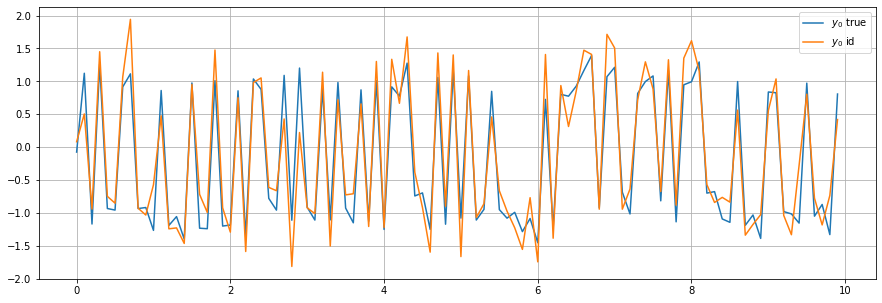

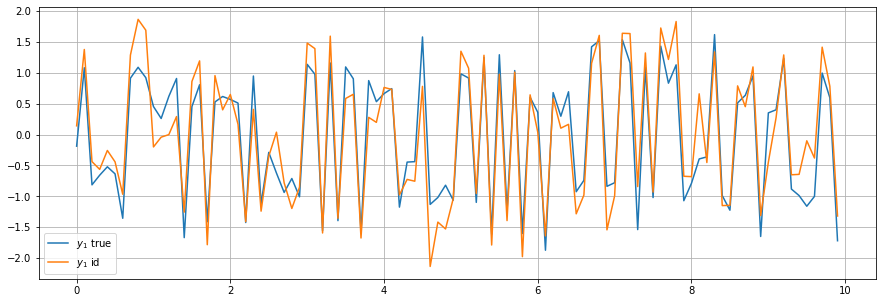

In [13]:
for i in range(2):
    pl.figure(figsize=(15,5))
    pl.plot(data2_id.t.T, data2_id.y[i,:].T,
            label='$y_{:d}$ true'.format(i))
    pl.plot(data2.t.T, data2.y[i,:].T,
            label='$y_{:d}$ id'.format(i))
    pl.legend()
    pl.grid()
print ('fit {:f}%'.format(100*sysid.subspace.nrms(
        data2_id.y, data2.y)))


In [14]:
# 2 internal states
# ss3 = sysid.StateSpaceDiscreteLinear(
#     A=np.matrix([[0,0.01],[0.2,0.3]]),
#     B=np.matrix([[1,0],[0,1]]),
#     C=np.matrix([[1,0],[0,1]]), 
#     D=np.matrix([[0,0],[0,0]]),
#     Q=pl.diag([0.2,0.1]), # Q == K?
#     R=pl.diag([0.04,0.04]), # R? 
#     dt=0.1)
# 4 internal states
# ss3 = sysid.StateSpaceDiscreteLinear(
#     A=np.matrix([[0,0.01, 0.2, 0.4],[0.1, 0.2, 0.2,0.3],[0.11, 0.12, 0.21,0.13],[0.11, 0.12, 0.21,0.13]]),
#     B=np.matrix([[1,0],[0,1],[1,0],[0,1]]),
#     C=np.matrix([[1,0, 0, 0],[0,1,0,0]]),
#     D=np.matrix([[0,0],[0,0]]),
#     Q=pl.diag([0.2,0.1,0.1,0.1]), # Q == K?
#     R=pl.diag([0.04,0.04]), # R? 
#     dt=0.1)
# ss3
# 4 internal states MIMO [3 IN, 2 OUT]
ss3 = sysid.StateSpaceDiscreteLinear(
    A=np.matrix([[0, 0.01, 0.2, 0.4], [0.1, 0.2, 0.2, 0.3], [0.11, 0.12, 0.21, 0.13], [0.11, 0.12, 0.21, 0.13]]),  # X x X
    B = np.matrix([[1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0]]),  # X x u
    C = np.matrix([[1, 0, 0, 0], [0, 1, 0, 0]]),  # y x x
    D = np.matrix([[0, 0, 0], [0, 0, 0]]),  # y x u
    Q = pl.diag([0.2, 0.1, 0.1, 0.1]),  #  X x X
    R = pl.diag([0.04, 0.04]),  # R? u x u or y x y?
    dt=0.1)

In [15]:
np.random.seed(1234)
prbs1 = sysid.prbs(1000)
prbs2 = sysid.prbs(1000)
prbs3 = sysid.prbs(1000)
def f_prbs_3d(t, x, i):
    i = i%1000
    return 2*np.matrix([prbs1[i]-0.5, prbs2[i]-0.5, prbs3[i]-0.5]).T

In [16]:
tf = 10
data3 = ss3.simulate(
    f_u=f_prbs_3d, x0=np.matrix([0,0,0,0]).T, tf=tf)
ss3_id = sysid.subspace_det_algo1(y=data3.y, u=data3.u,
    f=5, p=5, s_tol=0.2, dt=ss3.dt)
data3_id = ss3_id.simulate(
    f_u=f_prbs_3d,
    x0=np.matrix(pl.zeros(ss3_id.A.shape[0])).T, tf=tf)
ss3_id

{'A': matrix([[ 0.63481053, -0.30775179, -0.0414614 ,  0.30784088, -0.39621125,
         -0.53195097, -0.18196695],
        [-0.12715942, -0.60408267, -0.2016089 , -0.34427997,  0.08007478,
         -0.44795123, -0.28328987],
        [-0.01693624,  0.39117601,  0.07137586,  0.28323457,  0.46440953,
         -0.43972365,  0.11097623],
        [-0.08058146, -0.33408159, -0.11320374,  0.37007011, -0.47965321,
         -0.3564309 ,  0.1919946 ],
        [ 0.09786945, -0.23350476,  0.65025277, -0.14855404,  0.01118994,
         -0.06630301,  0.43212288],
        [-0.19910261,  0.06793399,  0.36457237, -0.4298117 , -0.60617457,
         -0.22935101, -0.67290684],
        [ 0.21746542,  0.21674324,  0.12815449, -0.04436614, -0.44279181,
          0.1903375 ,  0.30542841]]), 'B': matrix([[-0.27193805, -0.32149423, -0.01794483],
        [-0.31561526,  0.23714091, -0.12480095],
        [ 0.14704069,  0.05169277,  0.02393968],
        [ 0.19344254, -0.10548742, -0.07466349],
        [ 0.04980668,

In [17]:
print(data3.u.shape)
print(data3.x.shape)
print(data3.y.shape)

(3, 100)
(4, 100)
(2, 100)


fit -13629.120753%


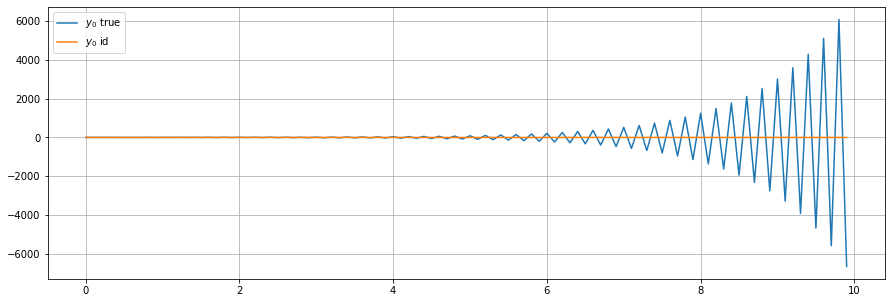

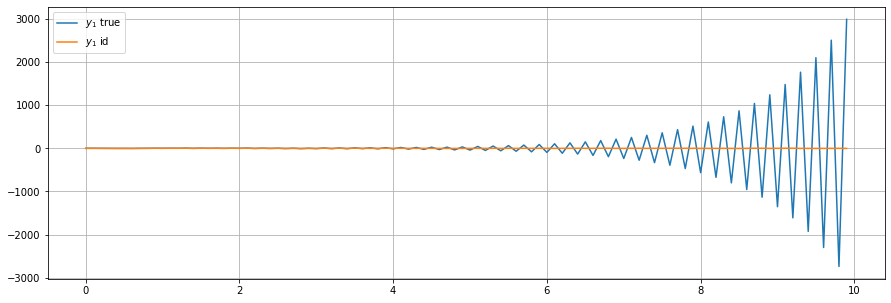

In [18]:
for i in range(2):
    pl.figure(figsize=(15,5))
    pl.plot(data3_id.t.T, data3_id.y[i,:].T,
            label='$y_{:d}$ true'.format(i))
    pl.plot(data3.t.T, data3.y[i,:].T,
            label='$y_{:d}$ id'.format(i))
    pl.legend()
    pl.grid()
print ('fit {:f}%'.format(100*sysid.subspace.nrms(
        data3_id.y, data3.y)))

--- Serial:		0.02499222755432129 seconds
fit 93.092930%


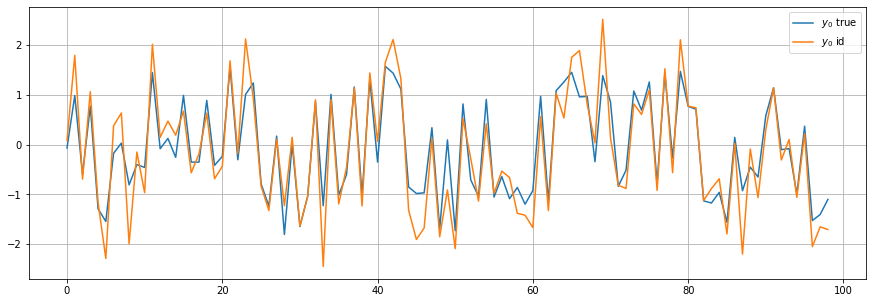

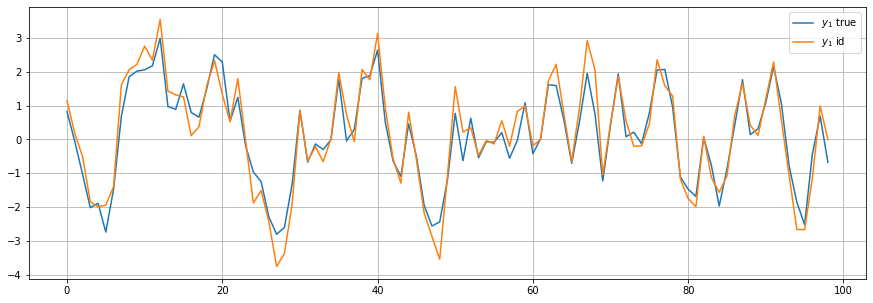

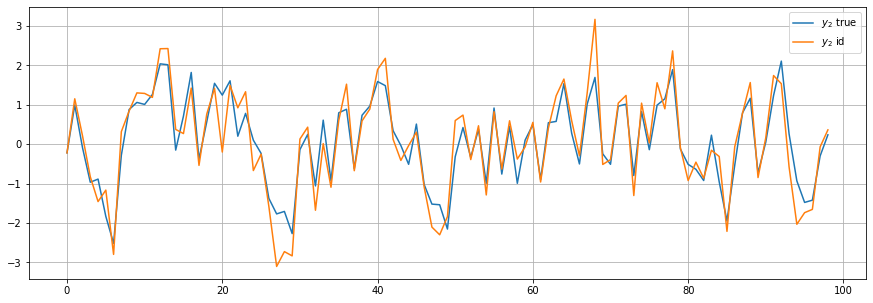

In [19]:
dt = 1.0
tf = 100

# 4 internal states MIMO [2 IN, 3 OUT]
ss3 = sysid.StateSpaceDiscreteLinear(
    A=np.matrix([[0, 0.01, 0.2, 0.4], [0.1, 0.2, 0.2, 0.3], [0.11, 0.12, 0.21, 0.13], [0.11, 0.12, 0.21, 0.13]]),  # X x X
    B = np.matrix([[1, 0], [0, 1], [1, 0], [0, 1]]),  # X x u
    C = np.matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0]]),  # y x x
    D = np.matrix([[0, 0], [0, 1], [0, 0]]),  # y x u
    Q = pl.diag([0.2, 0.1, 0.1, 0.1]),  #  X x X
    R = pl.diag([0.04, 0.04, 0.04]),  # R? y x y
    dt=dt)

np.random.seed(1234)
prbs1 = sysid.prbs(1000)
prbs2 = sysid.prbs(1000)
def f_prbs_3d(t, x, i):
    i = i%1000
    return 2*np.matrix([prbs1[i]-0.5, prbs2[i]-0.5]).T

data3 = ss3.simulate(
    f_u=f_prbs_3d, x0=np.matrix([0,0,0,0]).T, tf=tf)


start_time = time.time()  # Serial
ss3_id = sysid.subspace_det_algo1(y=data3.y, u=data3.u,
    f=5, p=5, s_tol=0.2, dt=ss3.dt)
print("--- Serial:\t\t{} seconds".format(time.time() - start_time))

data3_id = ss3_id.simulate(
    f_u=f_prbs_3d,
    x0=np.matrix(pl.zeros(ss3_id.A.shape[0])).T, tf=tf)

for i in range(3):
    pl.figure(figsize=(15,5))
    pl.plot(data3_id.t.T, data3_id.y[i,:].T,
            label='$y_{:d}$ true'.format(i))
    pl.plot(data3.t.T, data3.y[i,:].T,
            label='$y_{:d}$ id'.format(i))
    pl.legend()
    pl.grid()
print ('fit {:f}%'.format(100*sysid.subspace.nrms(
        data3_id.y, data3.y)))

In [26]:
tf = 365*8
dt = 1
plot_stuff = False

# TODO: check with randn 500 IN, 3 OUT
data_u = np.random.randn(500, tf)
data_y = np.random.randn(3, tf)

# data_u = data_uu
# data_y = data_yy

print("data_u.shape: {}, data_y.shape: {}".format(data_u.shape, data_y.shape))
print("MIMO [{} IN, {} OUT], {} time-steps.".format(data_u.shape[0], data_y.shape[0], data_u.shape[1]))

def f_prbs_4d(t, x, i):
    return np.matrix(data_u[:,i]).T

start_time = time.time()  # Serial
ss3_id = sysid.subspace_det_algo1(y=data_y, u=data_u,
    f=5,  # 5 Forward steps
    p=5,  # 5 Backward steps                  
    s_tol=0.01, # 0.2
    dt=dt,
    order=-1)
print("--- Serial:\t\t{} seconds".format(time.time() - start_time))

data3_id = ss3_id.simulate(
    f_u=f_prbs_4d,
    x0=np.matrix(pl.zeros(ss3_id.A.shape[0])).T, 
    tf=tf)

if plot_stuff:
    for i in range(3):
        pl.figure(figsize=(15,5))
        pl.plot(data3_id.t.T, data3_id.y[i,:].T,
                label='$y_{:d}$ true'.format(i))
        pl.plot(data3_id.t.T,
                np.matrix(data_y[i,:-1]).T,
                label='$y_{:d}$ id'.format(i))
        pl.legend()
        pl.grid()
print ('fit {:f}%'.format(100*sysid.subspace.nrms(
        data3_id.y, np.array(data_y[:,-1:]))))

data_u.shape: (500, 2920), data_y.shape: (3, 2920)
MIMO [500 IN, 3 OUT], 2920 time-steps.
--- Serial:		19.984026432037354 seconds
fit 19.025516%


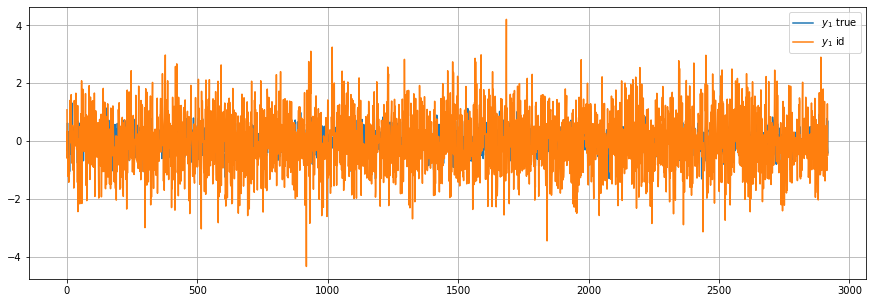

In [21]:
i = 1
pl.figure(figsize=(15,5))
pl.plot(data3_id.t.T, data3_id.y[i,:].T,
        label='$y_{:d}$ true'.format(i))
pl.plot(data3_id.t.T,
        np.matrix(data_y[i,:-1]).T,
        label='$y_{:d}$ id'.format(i))
pl.legend()
pl.grid()

In [22]:
df2 = pd.read_csv('sp500_joined_closes.csv')
df2["AAPL"] = df2["AAPL"].astype(float)
df2["MSFT"] = df2["MSFT"].astype(float)
df2["AMD"] = df2["AMD"].astype(float)
df2["INTC"] = df2["INTC"].astype(float)
df2["NVDA"] = df2["NVDA"].astype(float)
df2["AMZN"] = df2["AMZN"].astype(float)
df = df2[["AAPL", "MSFT", "AMD", "INTC", "NVDA", "AMZN"]]
#normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df=(df-df.mean())/(df.std())
data_uu = normalized_df[["AAPL", "MSFT", "AMZN"]].tail(tf).to_numpy().T

data_yy = normalized_df[["AMD", "NVDA", "INTC"]].tail(tf).to_numpy().T
print(data_uu.shape, data_yy.shape)


(3, 2615) (3, 2615)


In [23]:
import cupy as cp
x_gpu = cp.array([1, 2, 3])